<a href="https://colab.research.google.com/github/Zeeshan00789/Yes-bank-closing-price-prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.**

In [1]:
#Importing all the library

import numpy as np
import pandas as pd
from numpy import math

#Importing libraries for Data Visulization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Importing Machine Learning libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Module 1/Capstone Project 2/data_YesBank_StockPrices.csv")

In [ ]:
# Importing the dataset
df = pd.read_csv("/content/drive/MyDrive/data folder/data_YesBank_StockPrices.csv")

##Data Inspection

In [4]:
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [5]:
df.shape

(185, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


##Data Set Information

Date: It specifies the date.

Open: it specifies the opening price of the stock in that month.(Numeric)

High: it specifies the highest price of stock in that month.(Numeric)

Low: it specifies the lowest price of stock in that month.(Numeric)

Close: it specifies the closing price of stock in that month.(Numeric)

In [7]:
#unique values
df.nunique()

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

In [8]:
#checking duplicate values
df[df.duplicated()].count()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [9]:

df.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


In [10]:
#Changing the date into numbers
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

#Exploratory Data Analysis

## Plot of Date vs Closing Price

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 10 Text major ticklabel objects>)

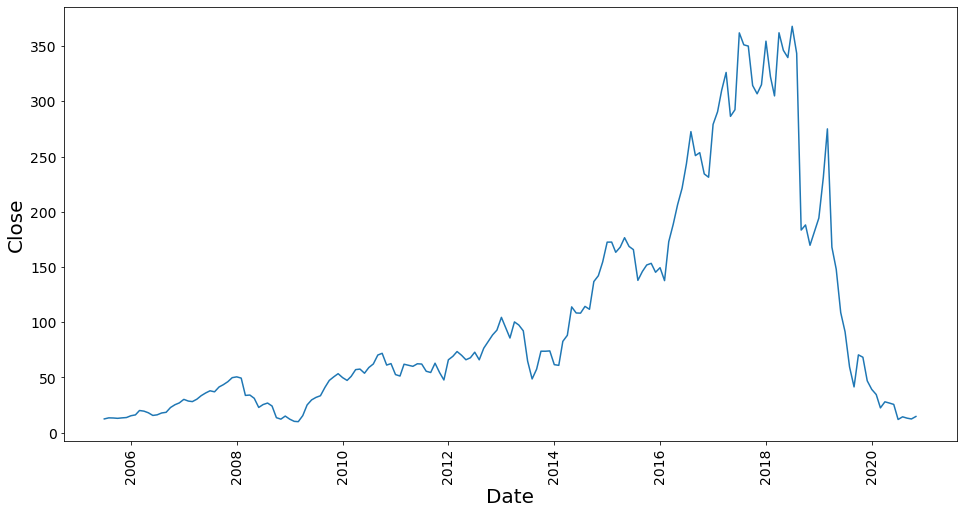

In [11]:
#figure size
plt.figure(figsize=(16,8))

#Plotting date vs close price graph
sns.lineplot(x=df['Date'], y=df['Close'])

#labelling
plt.xlabel('Date', fontsize= 20)
plt.ylabel('Close', fontsize= 20)

#font size of numbers
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

##Plot of all the Prices against Date

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 <a list of 11 Text major ticklabel objects>)

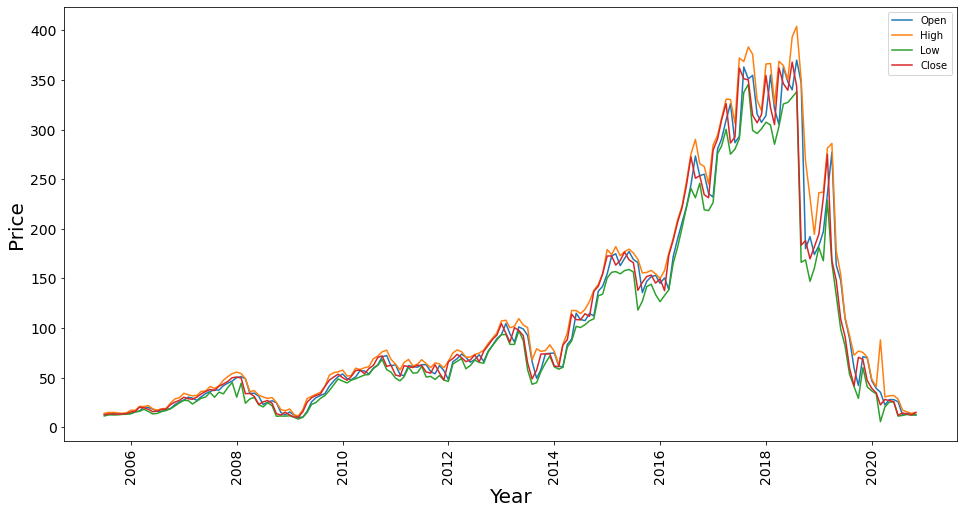

In [12]:
#Grouping of all columns
all_plot =df.groupby(['Date']).agg({'Open':"sum",'High':"sum",'Low':"sum",'Close':"sum"})

#figure size
plt.figure(figsize=(16,8))

#plotting line graph
sns.lineplot(data=all_plot, dashes= False)

#labelling
plt.xlabel('Year', fontsize= 20)
plt.ylabel('Price', fontsize= 20)

#font size of numbers
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)


##Histogram of dependent variable "Close Price"

(array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 ]),
 <a list of 6 Text major ticklabel objects>)

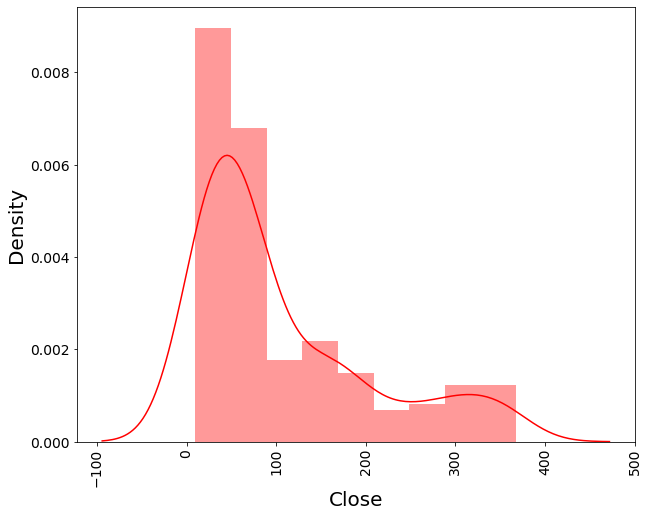

In [13]:


#figure size
plt.figure(figsize=(10,8))

#PLotting histogram
sns.distplot(df['Close'], color= 'r')

#labelling
plt.xlabel('Close', fontsize= 20)
plt.ylabel('Density', fontsize= 20)

#font size of numbers
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

##Applying Log Transformation in "Close Price"

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4]),
 <a list of 8 Text major ticklabel objects>)

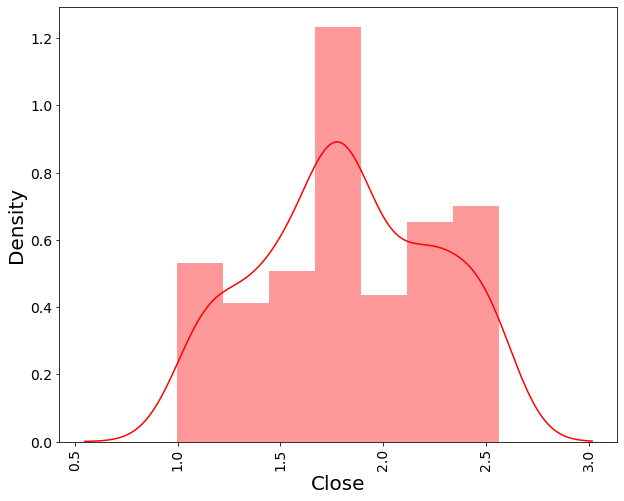

In [ ]:
#figure size
plt.figure(figsize=(10,8))

#plot after applying log 10
sns.distplot(np.log10(df['Close']), color= 'r')

#labelling
plt.xlabel('Close', fontsize= 20)
plt.ylabel('Density', fontsize= 20)

#font size of numbers
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

##Histogram of Independent variable

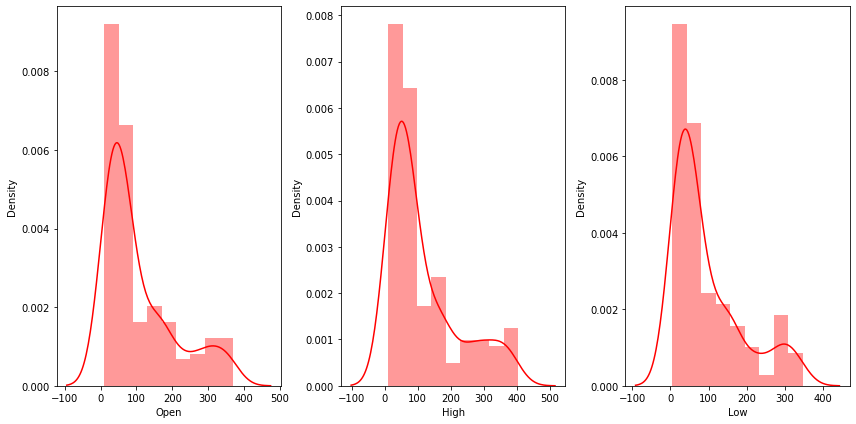

In [ ]:
# subplots and figure size
fig, axs = plt.subplots(ncols=3,figsize=(12,6))

#graph plot
sns.distplot(df['Open'], color='r', ax=axs[0])
sns.distplot(df['High'], color='r', ax=axs[1])
sns.distplot(df['Low'], color='r',ax=axs[2])

# this prevents plots from overlapping
plt.tight_layout()

##Applying log transformation in Independent variable

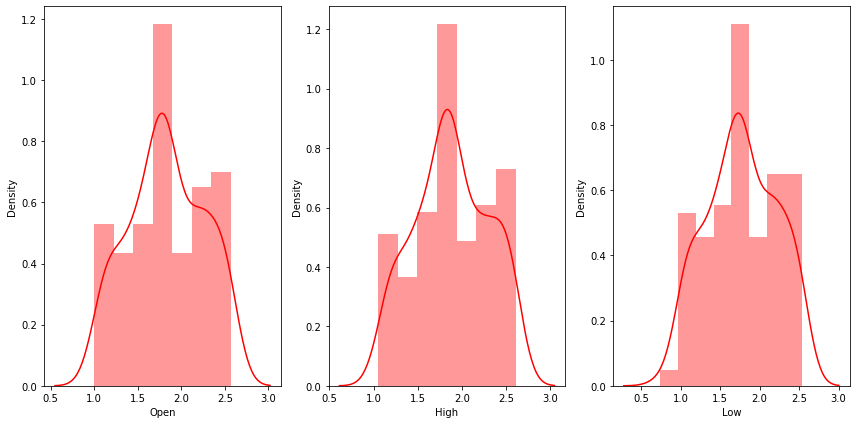

In [ ]:
# subplots and figure size
fig, axs = plt.subplots(ncols=3,figsize=(12,6))

#graph plot
sns.distplot(np.log10(df['Open']), color='r', ax=axs[0])
sns.distplot(np.log10(df['High']), color='r', ax=axs[1])
sns.distplot(np.log10(df['Low']), color='r',ax=axs[2])

# this prevents plots from overlapping
plt.tight_layout()

##Scatter Plot

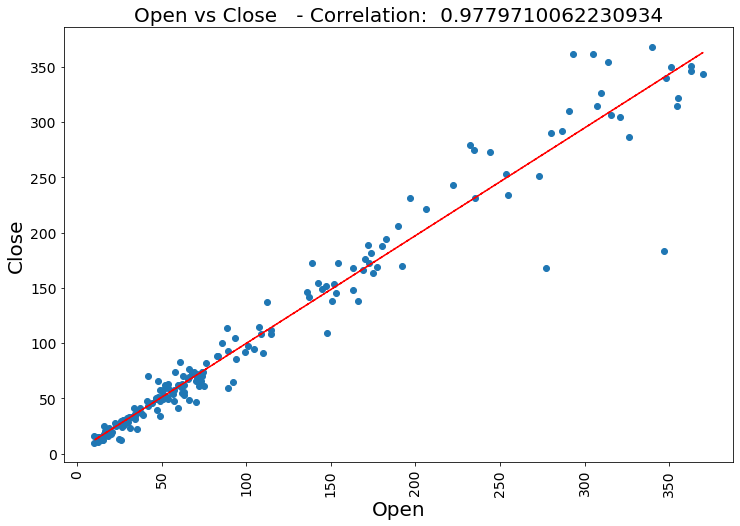

In [ ]:

stock_close=df['Close']
#correlation of Open and Close Price
correlation= df['Open'].corr(stock_close)

#figure size
fig = plt.figure(figsize=(12, 8))
ax = fig.gca()

#scatter plot
plt.scatter(x= df['Open'], y= df['Close'])

#title set
ax.set_title("Open vs Close" + "   - Correlation:  " + str(correlation), fontsize=20)

#labelling
plt.xlabel('Open', fontsize= 20)
plt.ylabel('Close', fontsize= 20)

#Font size of numbers
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

#best fit line
z = np.polyfit(df['Open'], df['Close'], 1)
y_hat = np.poly1d(z)(df["Open"])

plt.plot(df["Open"], y_hat, "r--", lw=1.5)

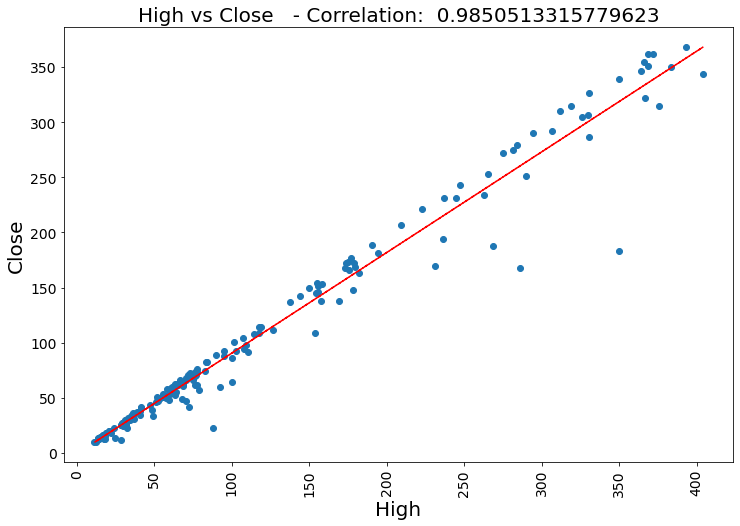

In [ ]:
stock_close=df['Close']

#correlation of High and Close Price
correlation= df['High'].corr(stock_close)

#figure size
fig = plt.figure(figsize=(12, 8))
ax = fig.gca()

#scatter plot
plt.scatter(x= df['High'], y= df['Close'])

#setting title
ax.set_title("High vs Close" + "   - Correlation:  " + str(correlation), fontsize=20)

#labelling
plt.xlabel('High', fontsize= 20)
plt.ylabel('Close', fontsize= 20)

#fontsize
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

#best fit line
z = np.polyfit(df['High'], df['Close'], 1)
y_hat = np.poly1d(z)(df["High"])

plt.plot(df["High"], y_hat, "r--", lw=1.5)



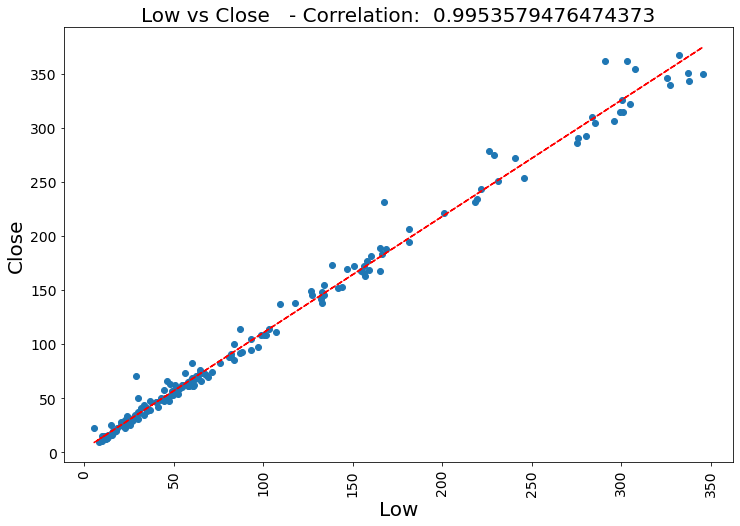

In [ ]:
stock_close=df['Close']

#correlation of Low and Close Price
correlation= df['Low'].corr(stock_close)

#figure size
fig = plt.figure(figsize=(12, 8))
ax = fig.gca()

#scatter plot
plt.scatter(x= df['Low'], y= df['Close'])

#setting title
ax.set_title("Low vs Close" + "   - Correlation:  " + str(correlation), fontsize=20)

#labelling
plt.xlabel('Low', fontsize= 20)
plt.ylabel('Close', fontsize= 20)

#fontsize
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

#best fit line
z = np.polyfit(df['Low'], df['Close'], 1)
y_hat = np.poly1d(z)(df["Low"])

plt.plot(df["Low"], y_hat, "r--", lw=1.5)



##Correlation 

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text major ticklabel objects>)

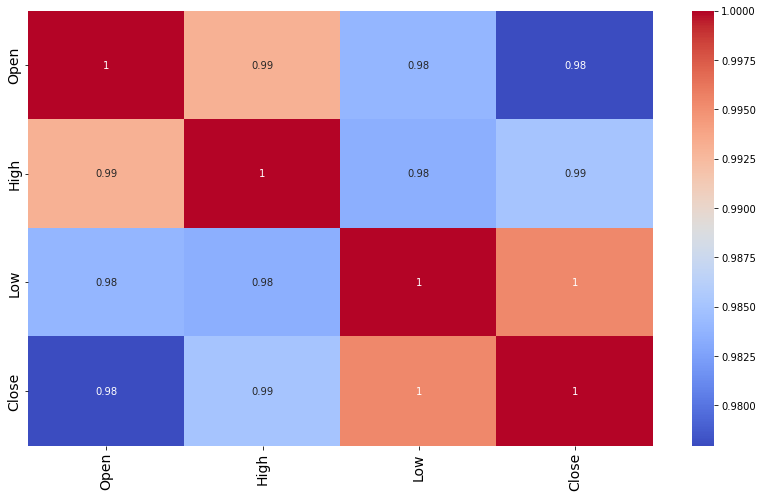

In [ ]:
#figure size of graph
plt.figure(figsize=(14,8))

#correlation
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

#font size of numbers
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

#Model

##Transforming & Spliting Data

In [ ]:
#head of the dataset
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


x = Independant Variable


y = Dependent Variable 

In [ ]:
# Splitting our data into Dependent and Independent Variables
x = df.drop(columns=['Close','Date'])
y = df['Close']

Data must be normal distributed. So applying narmalization on x & y. So applying normalisation on x & y.

In [ ]:
# Data transformation
from scipy.stats import zscore
x = x.apply(zscore)
y = np.log10(y)

training and testing data split, since dataset is small training date be 80% and testing data be 20%

In [ ]:
# Spliting Data into Testing and Training Datasets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 1)

In [ ]:
#checking shape of training dataset.
x_train.shape

(148, 3)

In [ ]:
#checking shape of testing dataset.
X_test.shape

(37, 3)

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

##1.Linear Regression

In [ ]:
#fitting data into Linear Regression
linear_reg = LinearRegression()
linear_reg_model = linear_reg.fit(X_train,y_train)

In [ ]:
#train accuracy of linear regression model
round(linear_reg.score(X_train,y_train), 3)

0.815

In [ ]:
np.array (y_test )

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [ ]:
#test accuracy of linear regression model
round(linear_reg.score(X_test,y_test), 3)

0.823

In [ ]:
#prediction of test data.
y_pred = linear_reg.predict(X_test)
y_pred

array([1.51738682, 1.53211837, 1.63519027, 1.47539354, 2.01471458,
       2.74366588, 1.62601875, 1.51851685, 1.52352095, 1.62092587,
       2.07716025, 1.61560053, 1.47290774, 2.63685207, 1.70384859,
       1.61032504, 1.52501328, 1.95399032, 1.81967493, 1.76423173,
       1.53162271, 1.480381  , 1.83883617, 1.6394682 , 2.05986731,
       1.49003242, 1.4767562 , 1.61402383, 1.53535964, 1.66894676,
       2.4177132 , 2.75914846, 1.68261819, 2.34869197, 1.78260049,
       1.62415017, 2.34100799])

In [ ]:

print("MSE :",round(mean_squared_error(y_test, y_pred), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred),3))
print("R2 :",round(r2_score(y_test, y_pred), 3))

MSE : 0.032
RMSE : 0.178
MAE : 0.151
MAPE : 0.095
R2 : 0.823


Actual Vs closing price

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.]),
 <a list of 9 Text major ticklabel objects>)

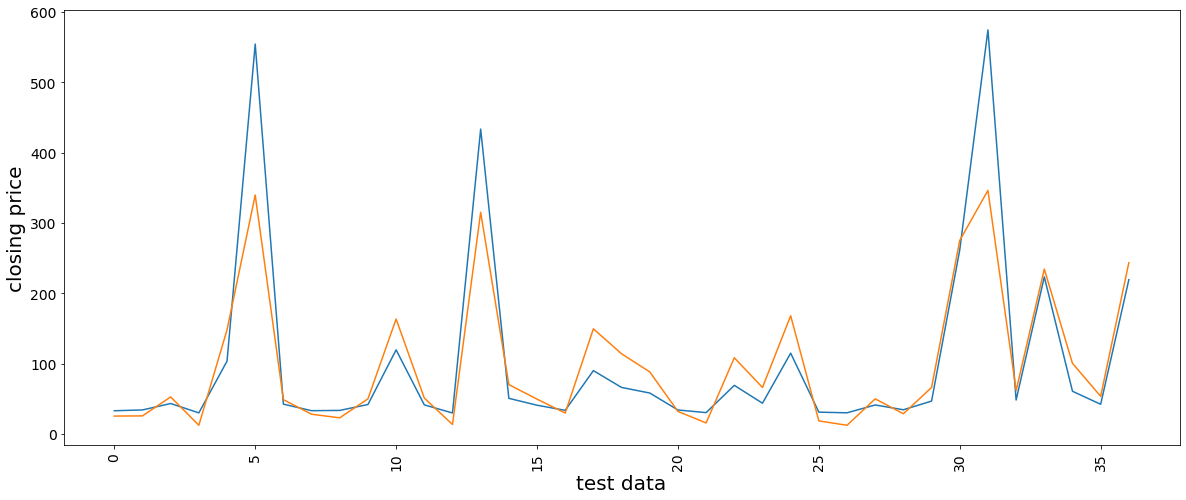

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=10**y_pred)
sns.lineplot(data=10**(np.array (y_test)))
plt.xlabel('test data', fontsize= 20)
plt.ylabel('closing price', fontsize= 20)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

##2. Lasso Regression

In [ ]:
lasso = Lasso(alpha=0.001, max_iter = 3000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001, max_iter=3000)

In [ ]:
# Accuracy of lasso regression model
round(lasso.score (X_train, y_train),4)

0.8145

In [ ]:
# prediction of train data
y_pred_lasso=lasso.predict(X_test)

In [ ]:
#cheching predication
y_pred_lasso


array([1.51725803, 1.53264824, 1.63868556, 1.47633632, 2.01634699,
       2.75076372, 1.63015628, 1.51758955, 1.5259266 , 1.62239869,
       2.08016013, 1.61615185, 1.47434662, 2.6385095 , 1.70577402,
       1.61199558, 1.52511908, 1.95750166, 1.81234011, 1.76292117,
       1.53273454, 1.4824815 , 1.84033138, 1.63520004, 2.06065324,
       1.49148696, 1.47771682, 1.61350164, 1.5366787 , 1.67242633,
       2.4063248 , 2.76847946, 1.68592645, 2.35447745, 1.7796874 ,
       1.62480239, 2.33633773])

In [ ]:
#checking array
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [ ]:
#test performance of lasso regression model
print("MSE :",round(mean_squared_error(y_test, y_pred_lasso), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_lasso)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_lasso),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_lasso),4))
print("R2 :",round(r2_score(y_test, y_pred_lasso), 4))

MSE : 0.0319
RMSE : 0.1787
MAE : 0.152
MAPE : 0.0958
R2 : 0.8206


(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.]),
 <a list of 9 Text major ticklabel objects>)

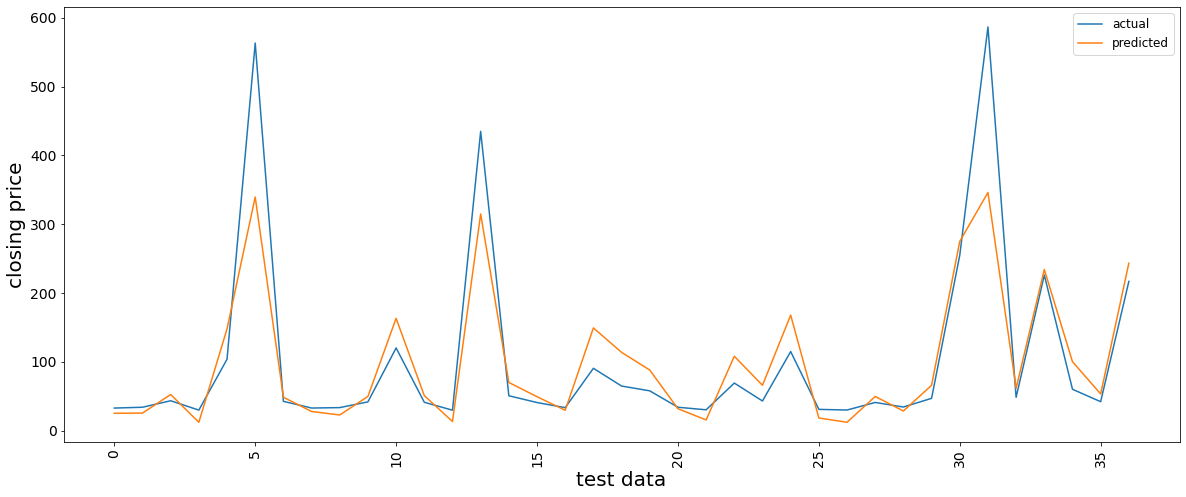

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=10**y_pred_lasso)
sns.lineplot(data=10**(np.array (y_test)))
plt.legend(['actual', 'predicted'],fontsize=12)
plt.xlabel('test data', fontsize= 20)
plt.ylabel('closing price', fontsize= 20)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

##Cross Validation of Lasso


In [ ]:
# Hyper parameter of Tuning For Lasso Regression
lasso=Lasso()
parameters ={'alpha': [1e-15, 1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters,scoring = 'neg_mean_squared_error', cv = 3, return_train_score=True)
lasso_regressor.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
print(" The best Fit alpha value is found out to be :", round(lasso_regressor.best_params_['alpha'], 4))
print(" The negative mean squared error is : ", round(lasso_regressor. best_score_,4))

 The best Fit alpha value is found out to be : 0.01
 The negative mean squared error is :  -0.0352


In [ ]:
y_pred_lasso1 = lasso_regressor.predict(X_test)
y_pred_lasso1

array([1.5246758 , 1.53967822, 1.64330447, 1.48473667, 2.01244712,
       2.7285637 , 1.63520241, 1.52506422, 1.53318726, 1.62734999,
       2.07429343, 1.62111986, 1.48267825, 2.61894213, 1.7086131 ,
       1.61716593, 1.53236729, 1.9545761 , 1.81309013, 1.76452438,
       1.53980312, 1.49069997, 1.84005176, 1.64003515, 2.05511403,
       1.49942522, 1.48609019, 1.6186234 , 1.54359818, 1.67617522,
       2.39311476, 2.74618564, 1.68942791, 2.34233898, 1.78097189,
       1.62960909, 2.32426455])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [ ]:

print("MSE :", round(mean_squared_error(y_test, y_pred_lasso1), 4))
print("RMSE :", round(math.sqrt(mean_squared_error(y_test, y_pred_lasso1)), 4))
print("MAE :", round(mean_absolute_error(y_test, y_pred_lasso1), 4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_lasso1), 4))
print("R2 :",round(r2_score(y_test, y_pred_lasso1), 4))

MSE : 0.0322
RMSE : 0.1795
MAE : 0.1528
MAPE : 0.0968
R2 : 0.819


(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.]),
 <a list of 8 Text major ticklabel objects>)

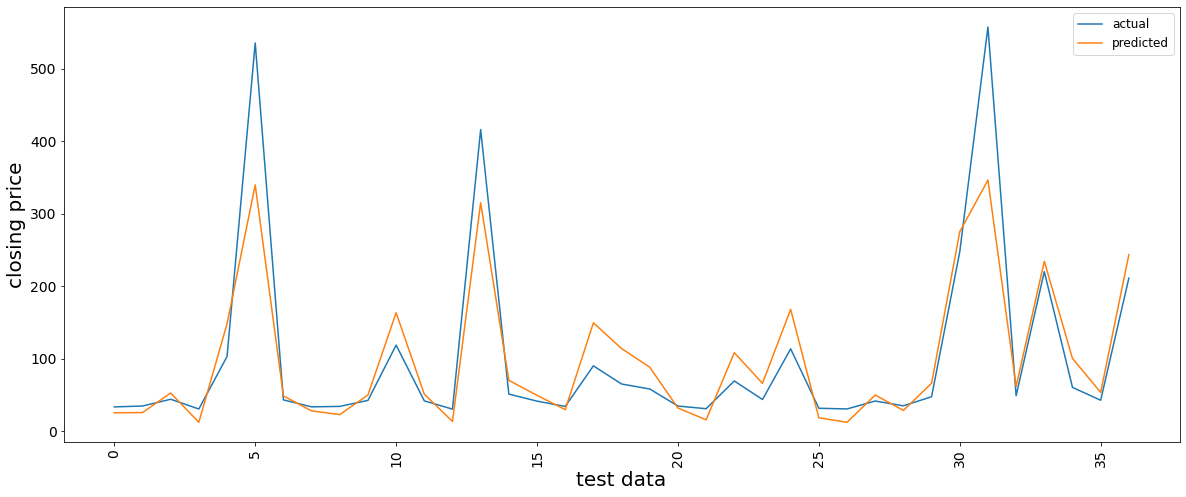

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=10**y_pred_lasso1)
sns.lineplot(data=10**(np.array (y_test)))
plt.legend(['actual', 'predicted'],fontsize=12)
plt.xlabel('test data', fontsize= 20)
plt.ylabel('closing price', fontsize= 20)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

##Ridge regression

In [ ]:
# fit data into ridge regression
from sklearn.linear_model import Ridge

ridge = Ridge (alpha= 0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
# Accuracy of Ridge regression model
round(ridge.score(X_train, y_train), 4)

0.8147

In [ ]:
# prediction of test data
y_pred_ridge = ridge.predict(X_test)
y_pred_ridge

array([1.51725986, 1.53215164, 1.63600352, 1.47552735, 2.01524649,
       2.74546591, 1.6270459 , 1.51820847, 1.52403533, 1.62122179,
       2.07792883, 1.61563413, 1.47313494, 2.63727671, 1.7042382 ,
       1.61066104, 1.5249501 , 1.95487086, 1.81790128, 1.76386063,
       1.53181029, 1.48079356, 1.8391624 , 1.63839195, 2.06005015,
       1.49026998, 1.47689613, 1.61381392, 1.53558533, 1.66974486,
       2.41507786, 2.76158664, 1.68339463, 2.35025992, 1.78185548,
       1.62422136, 2.33989198])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [ ]:
# Test Performance
print("MSE:", round(mean_squared_error (y_test, y_pred_ridge), 4))
print("RMSE:", round(math.sqrt(mean_squared_error (y_test, y_pred_ridge)), 4))
print("MAE:", round(mean_absolute_error(y_test, y_pred_ridge), 4))
print("MAPE:", round(mean_absolute_percentage_error(y_test, y_pred_ridge), 4))
print("R2 :", round(r2_score(y_test, y_pred_ridge), 4))

MSE: 0.0317
RMSE: 0.1779
MAE: 0.1514
MAPE: 0.0955
R2 : 0.8221


(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.]),
 <a list of 9 Text major ticklabel objects>)

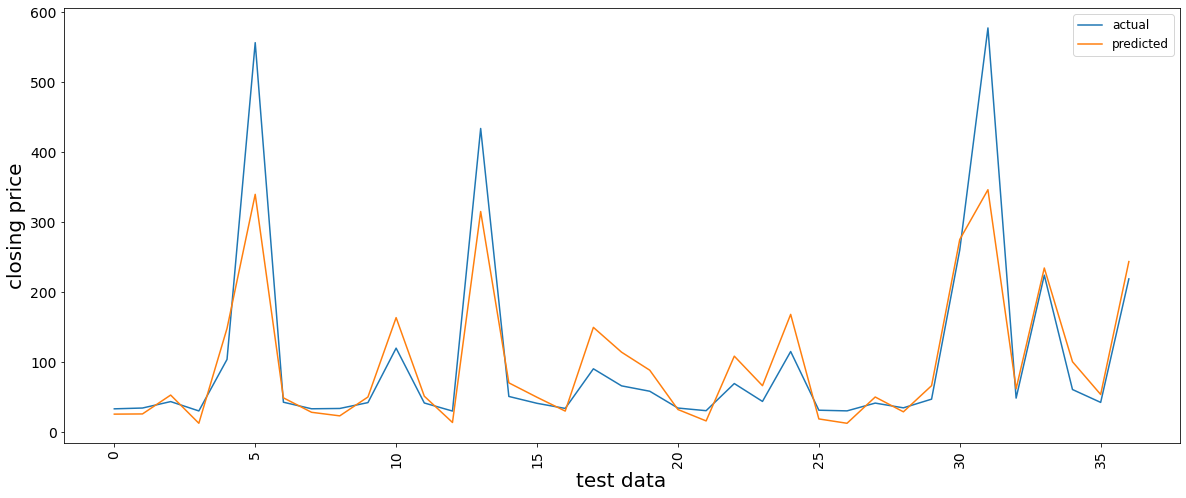

In [ ]:
#plotting
plt.figure(figsize=(20,8))
sns.lineplot(data=10**y_pred_ridge)
sns.lineplot(data=10**(np.array (y_test)))
plt.legend(['actual', 'predicted'],fontsize=12)
plt.xlabel('test data', fontsize= 20)
plt.ylabel('closing price', fontsize= 20)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

## implementing cross validation on ridge regression


In [ ]:
# Hyperparameter of tunning
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv=3)


In [ ]:
#data fit
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
#print values
print(" The Best Fit Alpha Value is found out to be :", ridge_regressor.best_params_['alpha'])
print(" The negative mean squared error for is :", round(ridge_regressor.best_score_, 3))

 The Best Fit Alpha Value is found out to be : 10
 The negative mean squared error for is : -0.035


In [ ]:
# Model Prediction
y_pred_ridge1 = ridge_regressor.predict(X_test)
y_pred_ridge1

array([1.52133054, 1.53728128, 1.64940763, 1.4839079 , 2.02368702,
       2.73378721, 1.64726711, 1.5213362 , 1.53624874, 1.6280259 ,
       2.07922307, 1.61714065, 1.48054103, 2.61189076, 1.70753952,
       1.61769429, 1.52987123, 1.96119864, 1.80123808, 1.75900482,
       1.53947926, 1.49160849, 1.83960113, 1.63228305, 2.05254637,
       1.49759728, 1.48541775, 1.61420655, 1.54258389, 1.68083452,
       2.37546978, 2.76285145, 1.69521298, 2.35812164, 1.77364892,
       1.62674463, 2.3102558 ])

In [ ]:
E# array of test data
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [ ]:
# Test Performance
print("MSE:", round(mean_squared_error (y_test, y_pred_ridge1), 4))
print("RMSE:", round(math.sqrt(mean_squared_error (y_test, y_pred_ridge1)), 4))
print("MAE:", round(mean_absolute_error(y_test, y_pred_ridge1), 4))
print("MAPE:", round(mean_absolute_percentage_error(y_test, y_pred_ridge1), 4))
print("R2 :", round(r2_score(y_test, y_pred_ridge1), 4))

MSE: 0.0325
RMSE: 0.1804
MAE: 0.1531
MAPE: 0.0968
R2 : 0.8172


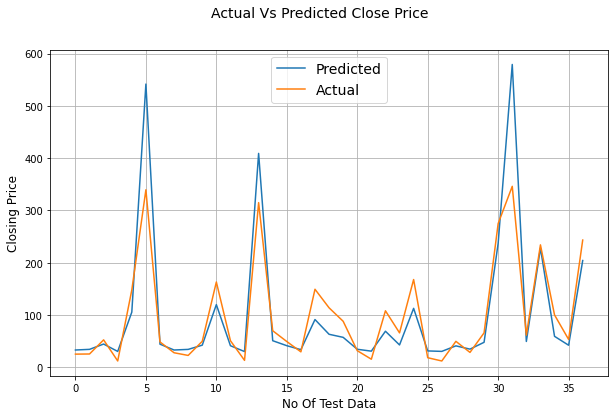

In [ ]:
# actual Price Vs Predicted Price for ridge regression
plt.figure(figsize=(10,6))
plt.plot(10**(y_pred_ridge1))
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Close Price', fontsize = 14)
plt.legend(['Predicted','Actual'], fontsize = 14)
plt.xlabel('No Of Test Data', fontsize= 12)
plt.ylabel('Closing Price', fontsize= 12)
plt.grid()

##XG Boost Regressor

In [ ]:
# fitting the data into XGBoost Regressor
from xgboost import XGBRegressor

In [ ]:
#Data fit
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

[10:29:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
#training
xgb.score(X_train,y_train)

0.9989856158912769

In [ ]:
y_pred_XG = xgb.predict(X_test)
y_pred_XG

array([1.3240345, 1.4481571, 1.7491498, 1.1570746, 2.1957493, 2.5145776,
       1.6748834, 1.402919 , 1.4481571, 1.7121533, 2.2350554, 1.7019634,
       1.097817 , 2.5032344, 1.8511137, 1.6865689, 1.443876 , 2.142931 ,
       2.006299 , 1.9523453, 1.4481571, 1.1984308, 2.025753 , 1.7286012,
       2.2308073, 1.2921474, 1.1570746, 1.7182921, 1.4809968, 1.7896991,
       2.4235322, 2.5344093, 1.8577319, 2.3706326, 1.9546288, 1.7555296,
       2.3739333], dtype=float32)

In [ ]:
#array check test 
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [ ]:
# Test Performance of XGBoost model after validation

print("MSE :",round(mean_squared_error(y_test, y_pred_XG), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_XG)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_XG),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_XG),4))
print("R2 :",round(r2_score(y_test, y_pred_XG), 4))

MSE : 0.0016
RMSE : 0.0394
MAE : 0.0303
MAPE : 0.0196
R2 : 0.9913


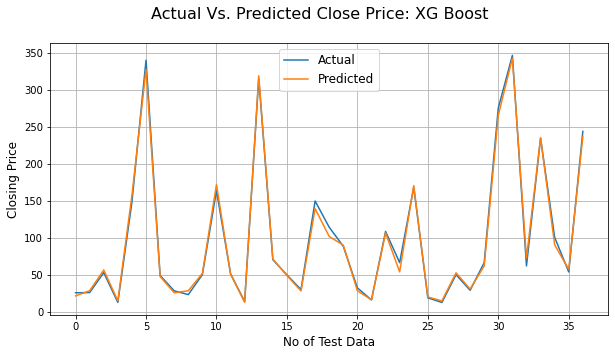

In [ ]:
# Actual Price vs. Predicted Price for XGboost after Validation Plotting 
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_XG))
plt.suptitle('Actual Vs. Predicted Close Price: XG Boost', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

##Implementing Elastic Net

In [ ]:
#fitting data into Elastic Net
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.1,l1_ratio=0.05)
elastic_model = elastic.fit(X_train,y_train)

In [ ]:
elastic.score(X_train,y_train)

0.8107386552145965

In [ ]:
y_pred_elastic = elastic.predict(X_test)

In [ ]:
# Test Performance of Elastic Net model
print("MSE :",round(mean_squared_error(y_test, y_pred_elastic), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_elastic)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_elastic),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_elastic),4))
print("R2 :",round(r2_score(y_test, y_pred_elastic), 4))

MSE : 0.0329
RMSE : 0.1815
MAE : 0.154
MAPE : 0.0978
R2 : 0.815


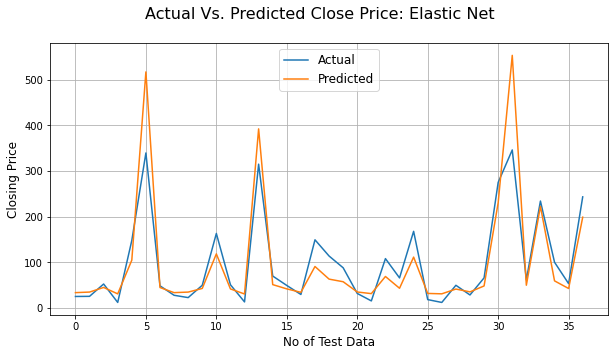

In [ ]:
# Actual Price vs. Predicted Price for Elastic Net Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_elastic))
plt.suptitle('Actual Vs. Predicted Close Price: Elastic Net', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

##cross validation on elestic net

In [ ]:
# Hyper-Parameter Tuning for Elastic Net

elastic = ElasticNet()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,1,2]}
elastic_model= GridSearchCV(elastic,parameters,scoring='neg_mean_squared_error',cv=3)

In [ ]:
elastic_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 2]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha and L1 ratio value is found out to be :" ,elastic_model.best_params_['alpha'], elastic_model.best_params_['l1_ratio'])
print("The negative mean squared error for is: ", round(elastic_model.best_score_,3))

The best fit alpha and L1 ratio value is found out to be : 0.01 1
The negative mean squared error for is:  -0.035


In [ ]:
y_pred_elastic1 = elastic_model.predict(X_test)
y_pred_elastic

array([1.52800375, 1.54363084, 1.6538612 , 1.49157484, 2.02054843,
       2.71355776, 1.65234854, 1.52805366, 1.5430137 , 1.63258347,
       2.07401048, 1.62153343, 1.48808712, 2.59363093, 1.71008334,
       1.62244504, 1.53642106, 1.95874914, 1.80151498, 1.76026465,
       1.54594285, 1.49916803, 1.83931208, 1.63644638, 2.04735111,
       1.50479474, 1.4930661 , 1.61873283, 1.54888066, 1.6844312 ,
       2.36273808, 2.742979  , 1.69862987, 2.34756703, 1.77455824,
       1.63103362, 2.29865142])

In [ ]:
# Test Performance of Elastic Net model after validation
print("MSE :",round(mean_squared_error(y_test, y_pred_elastic1), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_elastic1)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_elastic1),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_elastic1),4))
print("R2 :",round(r2_score(y_test, y_pred_elastic1), 4))

MSE : 0.0322
RMSE : 0.1795
MAE : 0.1528
MAPE : 0.0968
R2 : 0.819


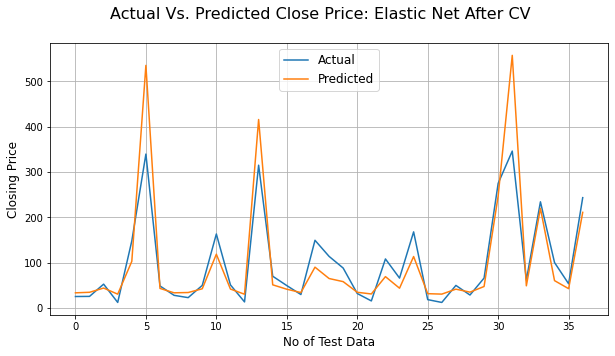

In [ ]:
# Actual Price vs. Predicted Price for Elastic Net after Validation Plotting 
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_elastic1))
plt.suptitle('Actual Vs. Predicted Close Price: Elastic Net After CV', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()